In [31]:
from collections.abc import Sequence
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import io
import glob
import requests
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import pandas as pd
os.chdir(r"C:\Users\14159\Desktop\AI\Prctce")

In [32]:
%matplotlib inline
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [33]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [34]:
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "UNSW_2018_IoT_Botnet_Final_10_best_Training.csv", index=False, encoding='utf-8-sig')

In [35]:
finaldata=combined_csv
finaldata

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,792371,udp,192.168.100.150,48516,192.168.100.3,80,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,DoS,UDP
1,2056418,tcp,192.168.100.148,22267,192.168.100.3,80,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,DDoS,TCP
2,2795650,udp,192.168.100.149,28629,192.168.100.3,80,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,DDoS,UDP
3,2118009,tcp,192.168.100.148,42142,192.168.100.3,80,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,DDoS,TCP
4,303688,tcp,192.168.100.149,1645,192.168.100.5,80,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,DoS,TCP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934812,1132803,udp,192.168.100.149,56044,192.168.100.5,80,253370,0.016992,100,4.082509,4,4.102515,100,0.000000,0.243473,4.124047,1,DoS,UDP
2934813,3384621,udp,192.168.100.150,21546,192.168.100.3,80,231693,1.922317,100,0.000000,4,2.718527,100,0.000000,0.490800,4.090534,1,DDoS,UDP
2934814,775893,udp,192.168.100.149,30897,192.168.100.5,80,158616,2.112228,100,0.000000,4,2.110766,100,0.000000,0.207444,4.332615,1,DoS,UDP
2934815,443484,tcp,192.168.100.147,36904,192.168.100.7,80,179855,0.000000,100,0.000000,3,0.000000,100,0.000000,0.162130,0.000000,1,DoS,TCP


In [36]:
finaldata.isnull().sum()

pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64

In [37]:
finaldata.proto

0          udp
1          tcp
2          udp
3          tcp
4          tcp
          ... 
2934812    udp
2934813    udp
2934814    udp
2934815    tcp
2934816    tcp
Name: proto, Length: 3668522, dtype: object

In [38]:
x=finaldata.dtypes
x

pkSeqID                int64
proto                 object
saddr                 object
sport                 object
daddr                 object
dport                 object
seq                    int64
stddev               float64
N_IN_Conn_P_SrcIP      int64
min                  float64
state_number           int64
mean                 float64
N_IN_Conn_P_DstIP      int64
drate                float64
srate                float64
max                  float64
attack                 int64
category              object
subcategory           object
dtype: object

In [39]:
finaldata.isnull().sum()

pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64

In [40]:
finaldata.columns

Index(['pkSeqID', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'seq', 'stddev',
       'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max', 'attack', 'category', 'subcategory'],
      dtype='object')

In [41]:
finaldata.dport
#values.astype(np.float32)

0          80
1          80
2          80
3          80
4          80
           ..
2934812    80
2934813    80
2934814    80
2934815    80
2934816    80
Name: dport, Length: 3668522, dtype: object

In [42]:
#from numpy import *
#finaldata["sport"] = pd.to_numeric(finaldata.sport, errors='coerce')
#finaldata["dport"] = pd.to_numeric(finaldata.sport, errors='coerce')

In [43]:
temp=finaldata.dtypes
temp

pkSeqID                int64
proto                 object
saddr                 object
sport                 object
daddr                 object
dport                 object
seq                    int64
stddev               float64
N_IN_Conn_P_SrcIP      int64
min                  float64
state_number           int64
mean                 float64
N_IN_Conn_P_DstIP      int64
drate                float64
srate                float64
max                  float64
attack                 int64
category              object
subcategory           object
dtype: object

In [44]:
finaldata.sport.isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
2934812    False
2934813    False
2934814    False
2934815    False
2934816    False
Name: sport, Length: 3668522, dtype: bool

In [45]:
check = list(finaldata['category'].unique())
check

['DoS', 'DDoS', 'Reconnaissance', 'Normal', 'Theft']

In [46]:
check = list(finaldata['subcategory'].unique())
check

['UDP',
 'TCP',
 'Service_Scan',
 'HTTP',
 'OS_Fingerprint',
 'Normal',
 'Keylogging',
 'Data_Exfiltration']

In [47]:
check = list(finaldata['proto'].unique())
check

['udp', 'tcp', 'icmp', 'arp', 'ipv6-icmp']

In [48]:
temp=finaldata.dtypes
temp

pkSeqID                int64
proto                 object
saddr                 object
sport                 object
daddr                 object
dport                 object
seq                    int64
stddev               float64
N_IN_Conn_P_SrcIP      int64
min                  float64
state_number           int64
mean                 float64
N_IN_Conn_P_DstIP      int64
drate                float64
srate                float64
max                  float64
attack                 int64
category              object
subcategory           object
dtype: object

In [49]:
finaldata.columns

Index(['pkSeqID', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'seq', 'stddev',
       'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max', 'attack', 'category', 'subcategory'],
      dtype='object')

In [50]:
finaldata.isnull().sum()

pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64

In [51]:
check = list(finaldata['sport'].unique())


In [52]:
finaldata.dropna(axis = 0, how ='any')

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,792371,udp,192.168.100.150,48516,192.168.100.3,80,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,DoS,UDP
1,2056418,tcp,192.168.100.148,22267,192.168.100.3,80,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,DDoS,TCP
2,2795650,udp,192.168.100.149,28629,192.168.100.3,80,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,DDoS,UDP
3,2118009,tcp,192.168.100.148,42142,192.168.100.3,80,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,DDoS,TCP
4,303688,tcp,192.168.100.149,1645,192.168.100.5,80,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,DoS,TCP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934812,1132803,udp,192.168.100.149,56044,192.168.100.5,80,253370,0.016992,100,4.082509,4,4.102515,100,0.000000,0.243473,4.124047,1,DoS,UDP
2934813,3384621,udp,192.168.100.150,21546,192.168.100.3,80,231693,1.922317,100,0.000000,4,2.718527,100,0.000000,0.490800,4.090534,1,DDoS,UDP
2934814,775893,udp,192.168.100.149,30897,192.168.100.5,80,158616,2.112228,100,0.000000,4,2.110766,100,0.000000,0.207444,4.332615,1,DoS,UDP
2934815,443484,tcp,192.168.100.147,36904,192.168.100.7,80,179855,0.000000,100,0.000000,3,0.000000,100,0.000000,0.162130,0.000000,1,DoS,TCP


In [53]:
finaldata.isnull().sum()

pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64

In [54]:
finaldata['sport'].isnull().sum()

0

In [55]:
%matplotlib inline
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [56]:
from collections.abc import Sequence
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os
 

# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)



# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), df.dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) \
               * (normalized_high - normalized_low) + normalized_low

In [57]:
finaldata.drop(['sport'], axis=1, inplace=True)
finaldata.drop(['dport'], axis=1, inplace=True)

In [58]:
proto = encode_text_dummy(finaldata,"proto")
saddr = encode_text_dummy(finaldata,"saddr")
daddr = encode_text_dummy(finaldata,"daddr")
category = encode_text_index(finaldata,"category")
subcategory = encode_text_dummy(finaldata,"subcategory")




In [59]:
finaldata.drop(['pkSeqID'], axis=1, inplace=True)

In [62]:
encode_numeric_zscore(finaldata,['seq', 'stddev',
       'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max', 'attack',])

In [63]:
import io
import requests
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from collections.abc import Sequence
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil



def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In [64]:
x,y = to_xy(finaldata,'category')

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

y_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [66]:
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(25, input_dim=x_train.shape[1], activation='relu'))
#model.add(Dense(10))
model.add(Dense(15,activation='relu',input_dim=20))
#model.add(Dropout(0.5))
model.add(Dense(10))
#model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=0, mode='auto')
checkpointer = ModelCheckpoint(filepath="best_weights1.hdf5", verbose=0, save_best_only=True) # save best model

model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000,batch_size=128)

#score = model.evaluate(x_test, y_test, batch_size=128)

model.load_weights('best_weights1.hdf5') 

Train on 2751391 samples, validate on 917131 samples
Epoch 1/1000
2751391/2751391 - 66s - loss: 0.0173 - val_loss: 0.0093
Epoch 2/1000
2751391/2751391 - 62s - loss: 0.0060 - val_loss: 0.0077
Epoch 3/1000
2751391/2751391 - 62s - loss: 0.0043 - val_loss: 0.0034
Epoch 4/1000
2751391/2751391 - 67s - loss: 0.0041 - val_loss: 0.0024
Epoch 5/1000
2751391/2751391 - 70s - loss: 0.0032 - val_loss: 0.0027
Epoch 6/1000
2751391/2751391 - 68s - loss: 0.0030 - val_loss: 0.0025


In [67]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1) # raw probabilities to choose class (highest probability)
print(y_pred)
y_test = np.argmax(y_test,axis=1)
print(y_test)

[1 1 3 ... 0 0 1]
[1 1 3 ... 0 0 1]


In [68]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.99930217166359

In [69]:
score = metrics.precision_score(y_test, y_pred, average= "weighted")
print("Precision-score: {}".format(score))

Precision-score: 0.9993029484342165


In [70]:
score = metrics.recall_score(y_test, y_pred, average= "weighted")
print("Recall-score: {}".format(score))

Recall-score: 0.99930217166359


In [71]:
score = metrics.f1_score(y_test,  y_pred, average= "weighted")
print("F1-score: {}".format(score))

F1-score: 0.9993024106847421


In [72]:
classification = metrics.classification_report(y_test, y_pred)

In [74]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix)
print(classification)
print(accuracy)

<function confusion_matrix at 0x000001847B022558>
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    481337
           1       1.00      1.00      1.00    412817
           2       0.97      1.00      0.98       129
           3       1.00      1.00      1.00     22829
           4       0.82      0.95      0.88        19

    accuracy                           1.00    917131
   macro avg       0.96      0.99      0.97    917131
weighted avg       1.00      1.00      1.00    917131

0.99930217166359


[[480958    378      0      0      1]
 [   253 412561      0      0      3]
 [     0      0    129      0      0]
 [     0      0      4  22825      0]
 [     0      1      0      0     18]]
Plotting confusion matrix


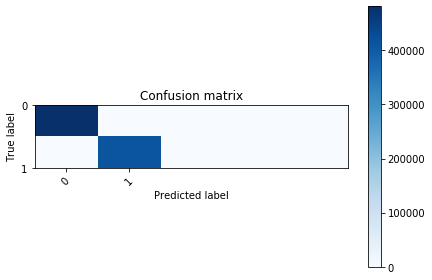

In [75]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cm, [0, 1])
plt.show()